In [7]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import folium
import imageio
from tqdm import tqdm_notebook
from folium.plugins import MarkerCluster
# import geoplot as gplt
# import geopandas as gpd
# import geoplot.crs as gcrs
import mapclassify as mc
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
import scipy
from itertools import product
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acf

plt.style.use('ggplot')
plt.rcParams['font.family'] = 'sans-serif' 
plt.rcParams['font.serif'] = 'Ubuntu' 
plt.rcParams['font.monospace'] = 'Ubuntu Mono' 
plt.rcParams['font.size'] = 14 
plt.rcParams['axes.labelsize'] = 12 
plt.rcParams['axes.labelweight'] = 'bold' 
plt.rcParams['axes.titlesize'] = 12 
plt.rcParams['xtick.labelsize'] = 12 
plt.rcParams['ytick.labelsize'] = 12 
plt.rcParams['legend.fontsize'] = 12 
plt.rcParams['figure.titlesize'] = 12 
plt.rcParams['image.cmap'] = 'jet' 
plt.rcParams['image.interpolation'] = 'none' 
plt.rcParams['figure.figsize'] = (12, 10) 
plt.rcParams['axes.grid']=True
plt.rcParams['lines.linewidth'] = 2 
plt.rcParams['lines.markersize'] = 8
colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd: goldenrod', 'xkcd:cadet blue',
'xkcd:scarlet']

In [8]:
import imageio

In [9]:
data = pd.read_csv('GlobalLandTemperaturesByMajorCity.csv')

In [14]:
city_data = data.drop_duplicates(['City'])

In [15]:
city_data.head()
# data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1977,1850-01-01,15.986,1.537,Addis Abeba,Ethiopia,8.84N,38.11E
3942,1796-01-01,19.649,2.286,Ahmadabad,India,23.31N,72.52E
6555,1791-05-01,20.836,1.993,Aleppo,Syria,36.17N,37.79E
9224,1791-05-01,20.772,1.848,Alexandria,Egypt,31.35N,30.16E


([<matplotlib.patches.Wedge at 0x7fef8a8e4350>,
 [Text(-1.0950344628649946, 0.10440079088767877, 'Non NaN elements'),
  Text(1.3936802176892007, -0.132873815410646, 'NaN elements')])

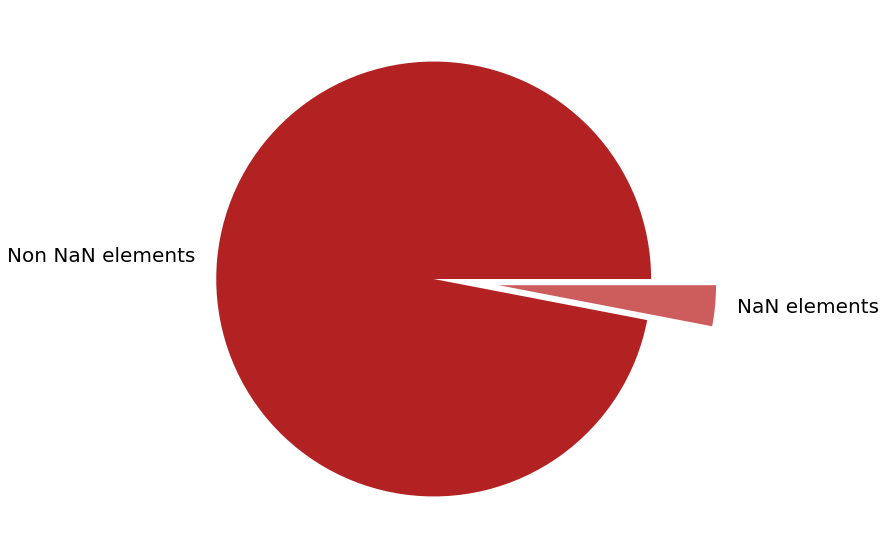

In [16]:
explodes = (0,0.3)
plt.pie(data[data['City']=='Chicago'].AverageTemperature.isna().value_counts(),explode=explodes,startangle=0,colors=['firebrick','indianred'],
   labels=['Non NaN elements','NaN elements'], textprops={'fontsize': 20})

In [17]:
city_data['City'].unique()

array(['Abidjan', 'Addis Abeba', 'Ahmadabad', 'Aleppo', 'Alexandria',
       'Ankara', 'Baghdad', 'Bangalore', 'Bangkok', 'Belo Horizonte',
       'Berlin', 'Bogotá', 'Bombay', 'Brasília', 'Cairo', 'Calcutta',
       'Cali', 'Cape Town', 'Casablanca', 'Changchun', 'Chengdu',
       'Chicago', 'Chongqing', 'Dakar', 'Dalian', 'Dar Es Salaam',
       'Delhi', 'Dhaka', 'Durban', 'Faisalabad', 'Fortaleza', 'Gizeh',
       'Guangzhou', 'Harare', 'Harbin', 'Ho Chi Minh City', 'Hyderabad',
       'Ibadan', 'Istanbul', 'Izmir', 'Jaipur', 'Jakarta', 'Jiddah',
       'Jinan', 'Kabul', 'Kano', 'Kanpur', 'Karachi', 'Kiev', 'Kinshasa',
       'Lagos', 'Lahore', 'Lakhnau', 'Lima', 'London', 'Los Angeles',
       'Luanda', 'Madras', 'Madrid', 'Manila', 'Mashhad', 'Melbourne',
       'Mexico', 'Mogadishu', 'Montreal', 'Moscow', 'Nagoya', 'Nagpur',
       'Nairobi', 'Nanjing', 'New Delhi', 'New York', 'Paris', 'Peking',
       'Pune', 'Rangoon', 'Rio De Janeiro', 'Riyadh', 'Rome', 'São Paulo',
       'S

In [18]:
lagos_data = data[data['City']=='Lagos']

In [19]:
lagos_data['AverageTemperature']=lagos_data.AverageTemperature.fillna(method='bfill')

/Users/DPRS/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
lagos_data['AverageTemperatureUncertainty']=lagos_data.AverageTemperatureUncertainty.fillna(method='bfill')

/Users/DPRS/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [31]:
lagos_data.tail()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Year,Month,Day,Weekday
1972,2013-05-01,27.904,0.456,Lagos,Nigeria,5.63N,3.23E,2013,5,1,2
1973,2013-06-01,27.059,0.616,Lagos,Nigeria,5.63N,3.23E,2013,6,1,5
1974,2013-07-01,26.506,0.385,Lagos,Nigeria,5.63N,3.23E,2013,7,1,0
1975,2013-08-01,25.689,0.406,Lagos,Nigeria,5.63N,3.23E,2013,8,1,3
1976,2013-09-01,NaN,NaN,Lagos,Nigeria,5.63N,3.23E,2013,9,1,6


In [21]:
lagos_data = lagos_data.reset_index()

In [22]:
lagos_data = lagos_data.drop(columns=['index'])

In [23]:
lagos_data.dt = pd.to_datetime(lagos_data.dt)

In [26]:
YEAR = []
MONTH = []
DAY = []
WEEKDAY = []
for i in range(len(lagos_data)):
    WEEKDAY.append(lagos_data.dt[i].weekday())
    DAY.append(lagos_data.dt[i].day)
    MONTH.append(lagos_data.dt[i].month)
    YEAR.append(lagos_data.dt[i].year)

In [27]:
lagos_data['Year'] = YEAR
lagos_data['Month'] = MONTH
lagos_data['Day'] = DAY 
lagos_data['Weekday'] = WEEKDAY

In [29]:
change_year_index = []
change_year = []
year_list = lagos_data['Year'].tolist()
for y in range(0,len(year_list)-1):
    if year_list[y]!=year_list[y+1]:
        change_year.append(year_list[y+1])
        change_year_index.append(y+1)

In [30]:
lagos_data.loc[change_year_index].head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Year,Month,Day,Weekday
12,1850-01-01,25.162,1.771,Lagos,Nigeria,5.63N,3.23E,1850,1,1,1
24,1851-01-01,26.423,1.459,Lagos,Nigeria,5.63N,3.23E,1851,1,1,2
36,1852-01-01,26.248,1.304,Lagos,Nigeria,5.63N,3.23E,1852,1,1,3
48,1853-01-01,26.248,1.304,Lagos,Nigeria,5.63N,3.23E,1853,1,1,5
60,1854-01-01,26.248,1.304,Lagos,Nigeria,5.63N,3.23E,1854,1,1,6


In [32]:
last_year_data = lagos_data[lagos_data.Year>=2010].reset_index().drop(columns=['index'])
P = np.linspace(0,len(last_year_data)-1,5).astype(int)

In [33]:
def get_timeseries(start_year,end_year):
    last_year_data = lagos_data[(lagos_data.Year>=start_year) & (lagos_data.Year<=end_year)].reset_index().drop(columns=['index'])
    return last_year_data

In [34]:
def plot_timeseries(start_year,end_year):
    last_year_data = get_timeseries(start_year,end_year)
    P = np.linspace(0,len(last_year_data)-1,5).astype(int)
    plt.plot(last_year_data.AverageTemperature,marker='.',color='firebrick')
    plt.xticks(np.arange(0,len(last_year_data),1)[P],last_year_data.dt.loc[P],rotation=60)
    plt.xlabel('Date (Y/M/D)')
    plt.ylabel('Average Temperature')

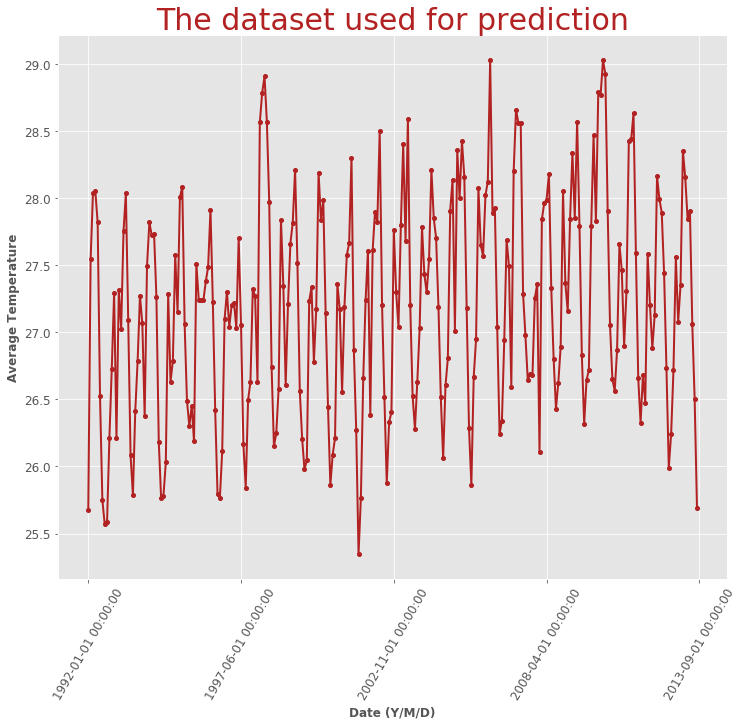

In [36]:
plt.title('The dataset used for prediction', fontsize=30,color='firebrick')
plot_timeseries(1992,2013)

In [45]:
temp = get_timeseries(1992,2013)
N = len(temp.AverageTemperature)
split = 0.90
training_size = round(split*N)
test_size = round((1-split)*N)
series = temp.AverageTemperature[:training_size]
date = temp.dt[:training_size]
test_series = temp.AverageTemperature[len(date)-1:len(temp)]
test_date = temp.dt[len(date)-1:len(temp)]
#test_date = test_date.reset_index().dt
#test_series = test_series.reset_index().AverageTemperature

In [38]:
test_date

234   2011-07-01
235   2011-08-01
236   2011-09-01
237   2011-10-01
238   2011-11-01
239   2011-12-01
240   2012-01-01
241   2012-02-01
242   2012-03-01
243   2012-04-01
244   2012-05-01
245   2012-06-01
246   2012-07-01
247   2012-08-01
248   2012-09-01
249   2012-10-01
250   2012-11-01
251   2012-12-01
252   2013-01-01
253   2013-02-01
254   2013-03-01
255   2013-04-01
256   2013-05-01
257   2013-06-01
258   2013-07-01
259   2013-08-01
260   2013-09-01
Name: dt, dtype: datetime64[ns]

In [43]:
def plot_from_data(data,time,c='firebrick',with_ticks=True,label=None):
    time = time.tolist()
    data = np.array(data.tolist())
    P = np.linspace(0,len(data)-1,5).astype(int)
    time = np.array(time)
    if label==None:
        plt.plot(data,marker='.',color=c)
    else:
        plt.plot(data,marker='.',color=c,label=label)
    if with_ticks==True:
        plt.xticks(np.arange(0,len(data),1)[P],time[P],rotation=60)
    plt.xlabel('Date (Y/M/D)')
    plt.ylabel('Average Temperature')

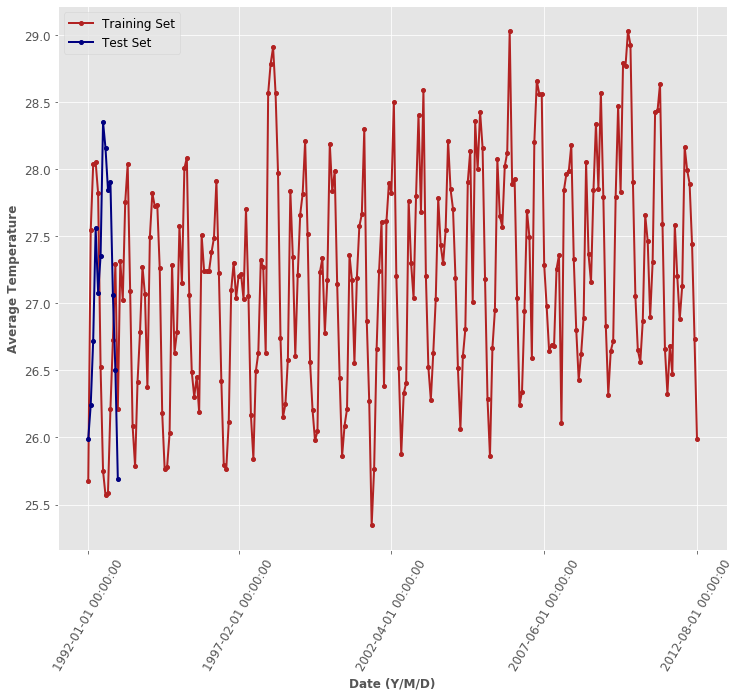

In [44]:
plot_from_data(series,date,label='Training Set')
plot_from_data(test_series,test_date,'navy',with_ticks=False,label='Test Set')
plt.legend()

In [46]:
def optimize_ARIMA(order_list, exog):
    """
        Return dataframe with parameters and corresponding AIC
        
        order_list - list with (p, d, q) tuples
        exog - the exogenous variable
    """
    
    results = []
    
    for order in tqdm_notebook(order_list):
        #try: 
        model = SARIMAX(exog, order=order).fit(disp=-1)
    #except:
    #        continue
            
        aic = model.aic
        results.append([order, model.aic])
    #print(results)
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p, d, q)', 'AIC']
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df

In [47]:
ps = range(0, 10, 1)
d = 0
qs = range(0, 10, 1)

# Create a list with all possible combination of parameters
parameters = product(ps, qs)
parameters_list = list(parameters)

order_list = []

for each in parameters_list:
    each = list(each)
    each.insert(1, d)
    each = tuple(each)
    order_list.append(each)
    
result_d_0 = optimize_ARIMA(order_list, exog = series)

/Users/DPRS/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/DPRS/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/DPRS/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/DPRS/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/DPRS/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:949: User

/Users/DPRS/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/DPRS/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/DPRS/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/DPRS/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/DPRS/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood opti

/Users/DPRS/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/DPRS/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


/Users/DPRS/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [48]:
result_d_0.head()

,"(p, d, q)",AIC
0,"(8, 0, 8)",253.854863
1,"(8, 0, 9)",256.070825
2,"(7, 0, 7)",260.058092
3,"(7, 0, 8)",267.952856
4,"(8, 0, 7)",278.881174


In [49]:
ps = range(0, 10, 1)
d = 1
qs = range(0, 10, 1)

# Create a list with all possible combination of parameters
parameters = product(ps, qs)
parameters_list = list(parameters)

order_list = []

for each in parameters_list:
    each = list(each)
    each.insert(1, d)
    each = tuple(each)
    order_list.append(each)
    
result_d_1 = optimize_ARIMA(order_list, exog = series)

result_d_1

/Users/DPRS/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/DPRS/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/DPRS/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/DPRS/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/DPRS/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood opti

/Users/DPRS/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/DPRS/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/DPRS/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/DPRS/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/DPRS/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood opti

/Users/DPRS/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


,"(p, d, q)",AIC
0,"(9, 1, 9)",227.683053
1,"(8, 1, 9)",237.721337
2,"(7, 1, 8)",243.741494
3,"(7, 1, 9)",244.432646
4,"(6, 1, 7)",255.996157
...,...,...
95,"(0, 1, 0)",486.446524
96,"(0, 1, 1)",488.094122
97,"(1, 1, 0)",488.133796
98,"(2, 1, 0)",489.234691


In [50]:
result_d_1.head()

,"(p, d, q)",AIC
0,"(9, 1, 9)",227.683053
1,"(8, 1, 9)",237.721337
2,"(7, 1, 8)",243.741494
3,"(7, 1, 9)",244.432646
4,"(6, 1, 7)",255.996157


In [51]:
final_result = result_d_0.append(result_d_1)

In [52]:
best_models = final_result.sort_values(by='AIC', ascending=True).reset_index(drop=True).head()

In [53]:
best_model_params_0 = best_models[best_models.columns[0]][0]
best_model_params_1 = best_models[best_models.columns[0]][1]

In [54]:
best_model_0 = SARIMAX(series, order=best_model_params_0).fit()
print(best_model_0.summary())
best_model_1 = SARIMAX(series, order=best_model_params_1).fit()
print(best_model_1.summary())

/Users/DPRS/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                           Statespace Model Results                           
Dep. Variable:     AverageTemperature   No. Observations:                  235
Model:               SARIMAX(9, 1, 9)   Log Likelihood                 -94.842
Date:                Mon, 28 Jun 2021   AIC                            227.683
Time:                        21:27:24   BIC                            293.334
Sample:                             0   HQIC                           254.154
                                - 235                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4600      0.099      4.660      0.000       0.267       0.654
ar.L2         -0.0419      0.047     -0.886      0.375      -0.135       0.051
ar.L3          0.0250      0.049      0.512      0.6

/Users/DPRS/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


FORECASTING


In [55]:
fore_l= test_size-1
forecast = best_model_0.get_prediction(start=training_size, end=training_size+fore_l)
forec = forecast.predicted_mean
ci = forecast.conf_int(alpha=0.05)

s_forecast = best_model_1.get_prediction(start=training_size, end=training_size+fore_l)
s_forec = s_forecast.predicted_mean
s_ci = forecast.conf_int(alpha=0.05)

In [58]:
error_test=lagos_data.loc[test_date[1:].index.tolist()].AverageTemperatureUncertainty
index_test = test_date[1:].index.tolist()
test_set = test_series[1:]

In [59]:
lower_test = test_set-error_test
upper_test = test_set+error_test

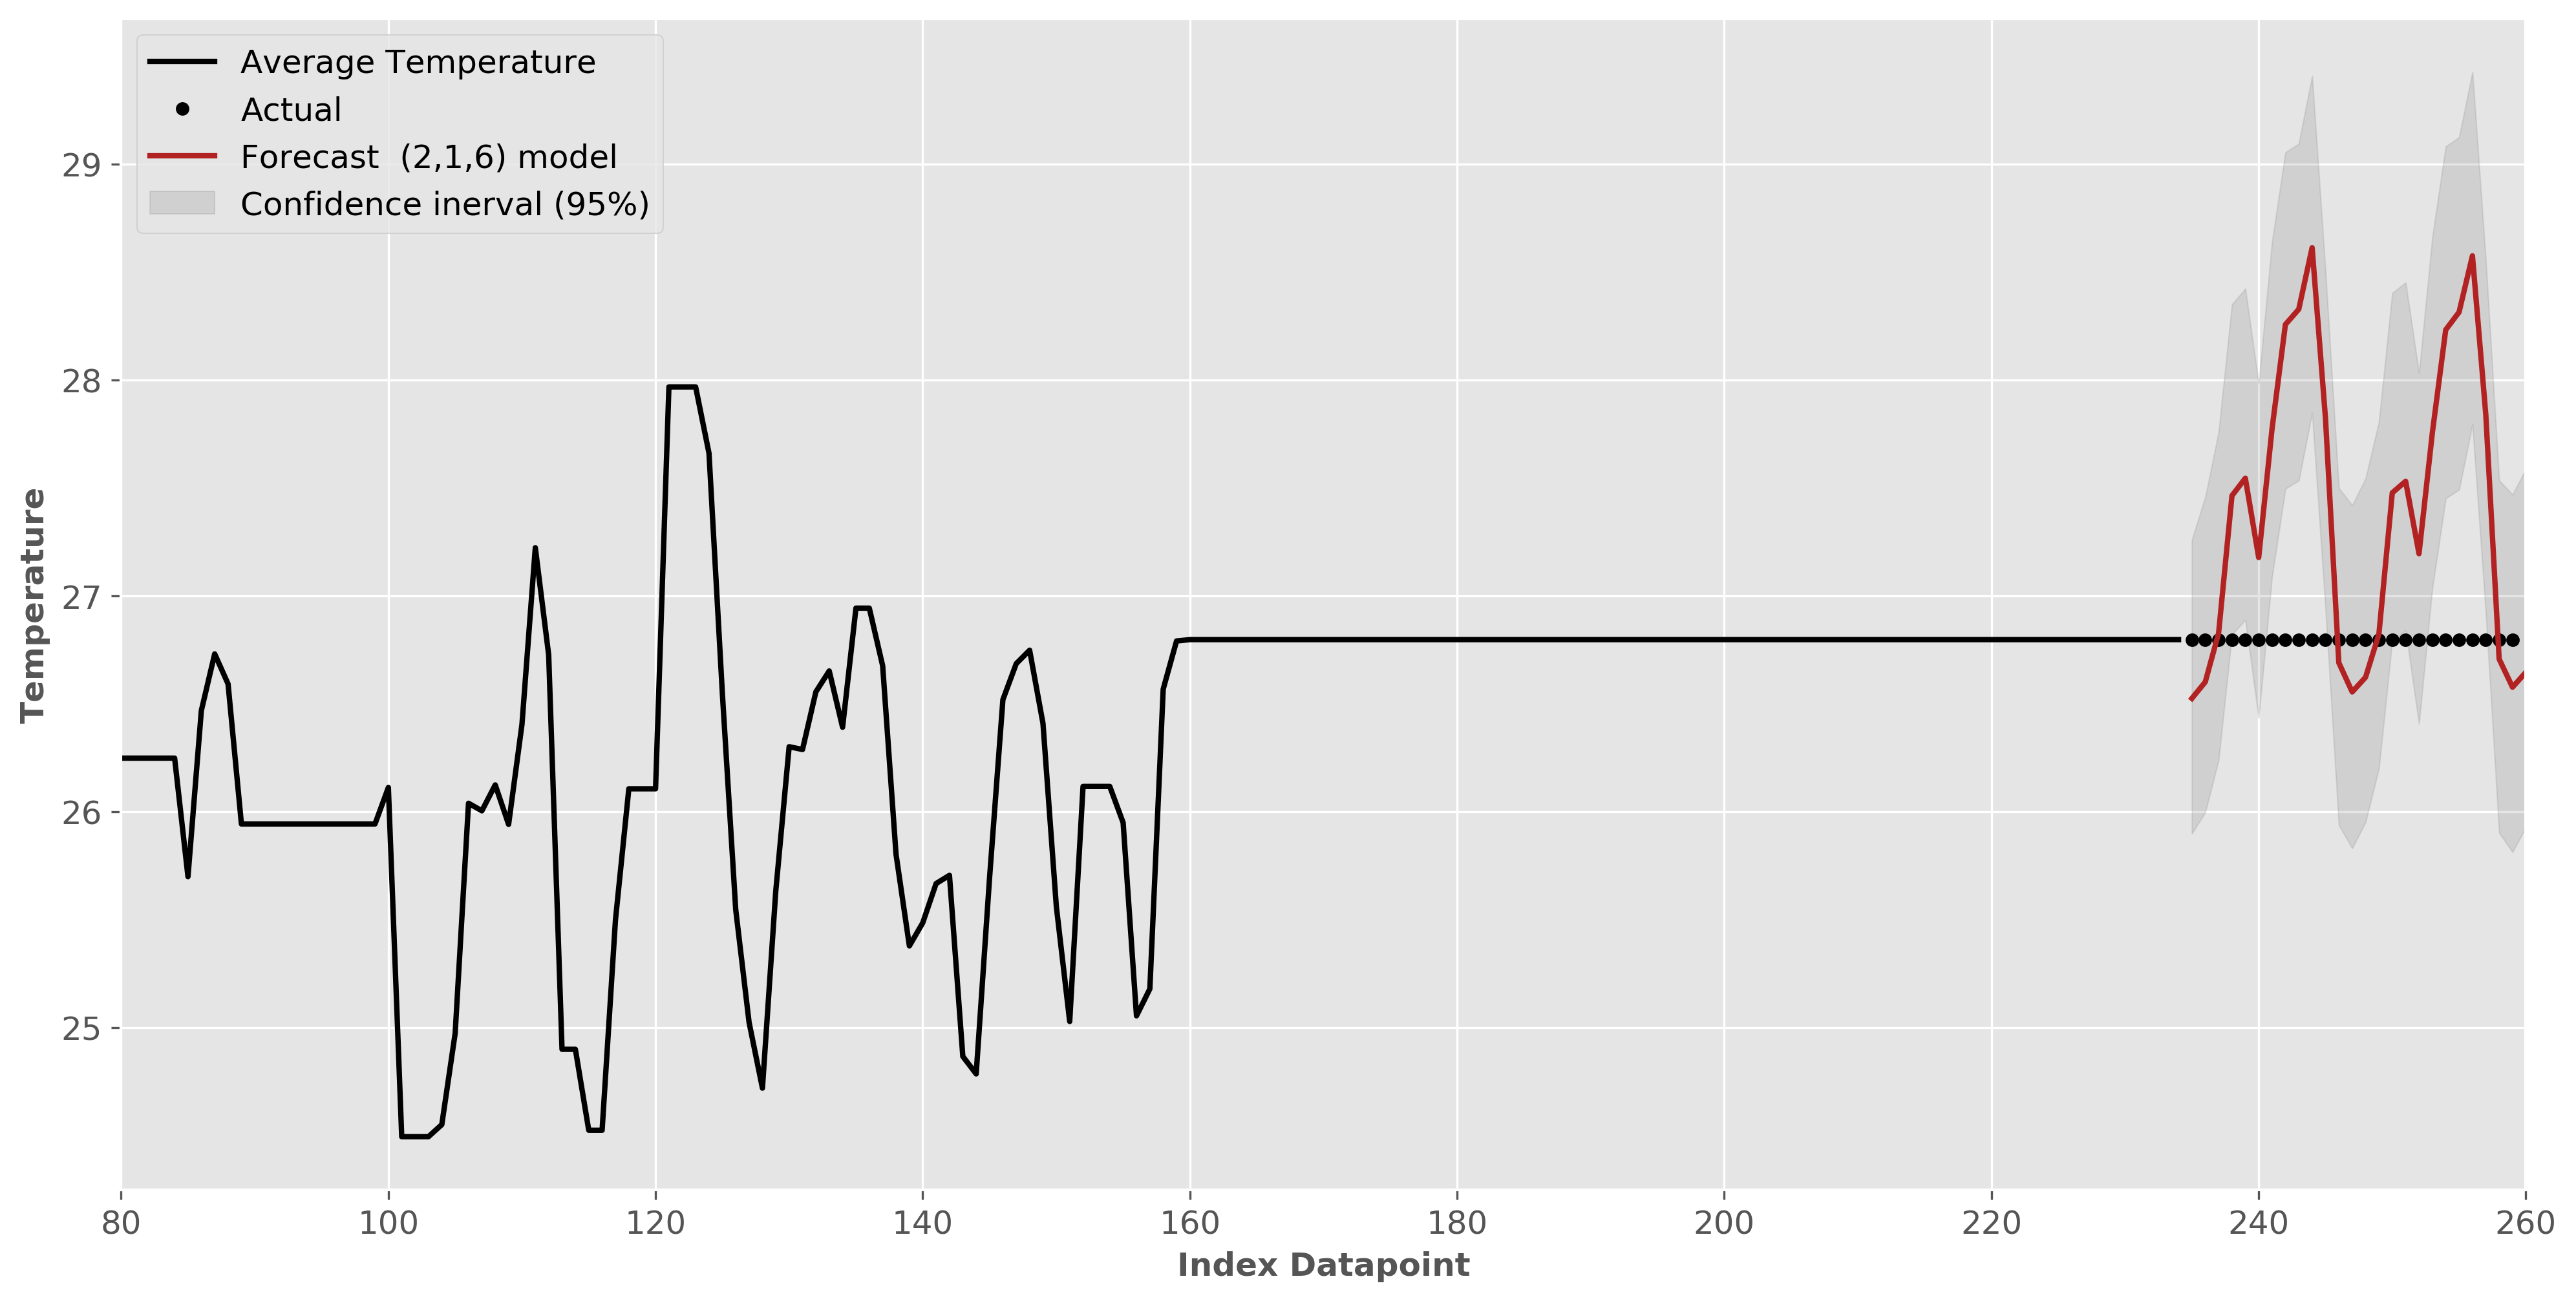

In [62]:
fig, ax = plt.subplots(figsize=(16,8), dpi=300)
x0 = lagos_data.AverageTemperature.index[0:training_size]
x1=lagos_data.AverageTemperature.index[training_size:training_size+fore_l+1]
#ax.fill_between(forec, ci['lower Load'], ci['upper Load'])
plt.plot(x0, lagos_data.AverageTemperature[0:training_size],'k', label = 'Average Temperature')

plt.plot(lagos_data.AverageTemperature[training_size:training_size+fore_l], '.k', label = 'Actual')

forec = pd.DataFrame(forec, columns=['f'], index = x1)
#forec.f.plot(ax=ax,color = 'Darkorange',label = 'Forecast (d = 2)')
#ax.fill_between(x1, ci['lower AverageTemperature'], ci['upper AverageTemperature'],alpha=0.2, label = 'Confidence inerval (95%)',color='grey')

s_forec = pd.DataFrame(s_forec, columns=['f'], index = x1)
s_forec.f.plot(ax=ax,color = 'firebrick',label = 'Forecast  (2,1,6) model')
ax.fill_between(x1, s_ci['lower AverageTemperature'], s_ci['upper AverageTemperature'],alpha=0.2, label = 'Confidence inerval (95%)',color='grey')


plt.legend(loc = 'upper left')
plt.xlim(80,)
plt.xlabel('Index Datapoint')
plt.ylabel('Temperature')
plt.show()

Text(0, 0.5, 'Temperature')

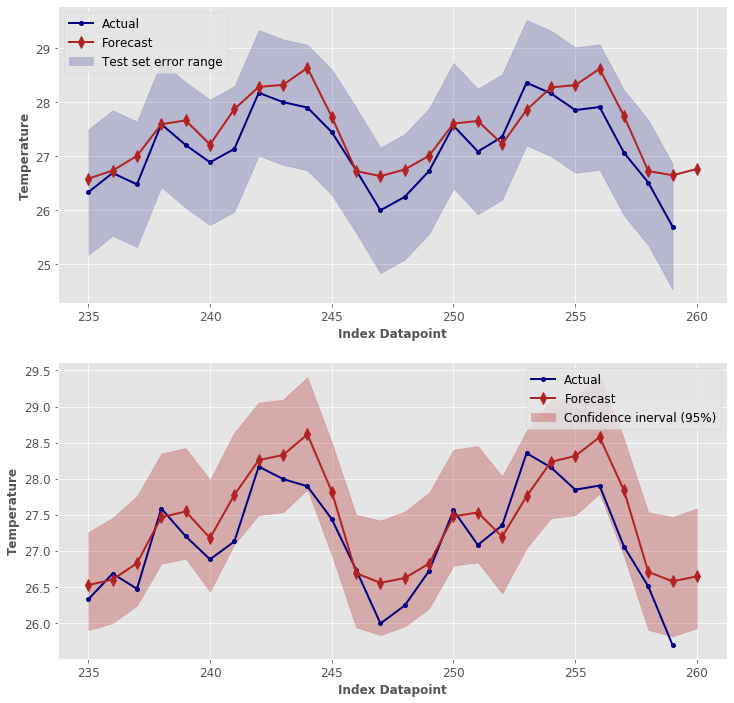

In [63]:
#plt.plot(forec)
plt.figure(figsize=(12,12))
plt.subplot(2,1,1)
plt.fill_between(x1, lower_test, upper_test,alpha=0.2, label = 'Test set error range',color='navy')
plt.plot(test_set,marker='.',label="Actual",color='navy')
plt.plot(forec,marker='d',label="Forecast",color='firebrick')
plt.xlabel('Index Datapoint')
plt.ylabel('Temperature')
#plt.fill_between(x1, s_ci['lower AverageTemperature'], s_ci['upper AverageTemperature'],alpha=0.3, label = 'Confidence inerval (95%)',color='firebrick')
plt.legend()
plt.subplot(2,1,2)
#plt.fill_between(x1, lower_test, upper_test,alpha=0.2, label = 'Test set error range',color='navy')
plt.plot(test_set,marker='.',label="Actual",color='navy')
plt.plot(s_forec,marker='d',label="Forecast",color='firebrick')
plt.fill_between(x1, ci['lower AverageTemperature'], ci['upper AverageTemperature'],alpha=0.3, label = 'Confidence inerval (95%)',color='firebrick')
plt.legend()
plt.xlabel('Index Datapoint')
plt.ylabel('Temperature')

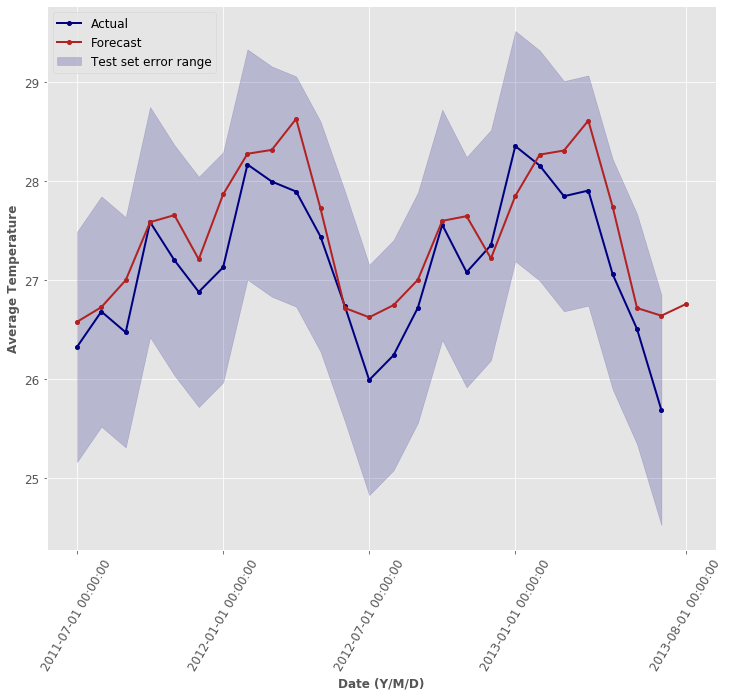

In [64]:
plt.fill_between(np.arange(0,len(test_set),1), lower_test, upper_test,alpha=0.2, label = 'Test set error range',color='navy')
plot_from_data(test_set,test_date,c='navy',label='Actual')
plot_from_data(forec['f'],test_date,c='firebrick',label='Forecast')
plt.legend(loc=2)